In [3]:
from PyDBDdim.utils import DimensionlessLearning
import torch
torch.manual_seed(0)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
from sklearn.model_selection import train_test_split
from vics_fcns import top_split_y#, top_split_x

warnings.filterwarnings("ignore")


In [4]:
#df = pd.ExcelFile(r"mass_balance_params.xlsx")
df_2 = pd.ExcelFile(r'C:\Users\vvmil\Documents\Python_Vmil\Jupyter_Notebooks\Plasma_He_calcs\He_code_new\collected_output_files_packing\data_from_EB_looping_all_sizes_remove_extraneous_dims.xlsx')
#df_2 = pd.ExcelFile(r'C:\Users\vvmil\Documents\Python_Vmil\Jupyter_Notebooks\Plasma_He_calcs\data\data_no_packing_all\data_from_EB_looping_new_excel_new_code_no_packing_v3.xlsx')

In [5]:
# df_train_x['u_B_m_s'] = df_train_x['u_B_m_s'] / 1000 if np.min(df_train_x['u_B_m_s']) > 0 else df_train_x['u_B_m_s'] / 1000 - (np.min(df_train_x['u_B_m_s']) / 1000-1e-5)
# df_train_x['A_tot_m2'] = 1.
# df_train_x['t_a_s'] = df_train_x['t_a_s'] / 1e-7 if np.min(df_train_x['t_a_s']) > 0 else df_train_x['t_a_s'] / 1e-7 - (np.min(df_train_x['t_a_s']) / 1e-7-1e-5)
# df_train_x['t_b_s'] = df_train_x['t_b_s'] / 1e-4 if np.min(df_train_x['t_b_s']) > 0 else df_train_x['t_b_s'] / 1e-4 - (np.min(df_train_x['t_b_s']) / 1e-4-1e-5)
# df_train_x['Volume_m3'] = 1.
# df_train_x['K_iz_a_m3_s_atom'] = df_train_x['K_iz_a_m3_s_atom'] / 1e-15 if np.min(df_train_x['K_iz_a_m3_s_atom']) > 0 else df_train_x['K_iz_a_m3_s_atom'] / 1e-15 - (np.min(df_train_x['K_iz_a_m3_s_atom']) / 1e-15-1e-5)

# df_train_x['K_2_iz_a_m3_s_atom'] = df_train_x['K_2_iz_a_m3_s_atom'] / 1e-15 if np.min(df_train_x['K_2_iz_a_m3_s_atom']) > 0 else df_train_x['K_2_iz_a_m3_s_atom'] / 1e-15 - (np.min(df_train_x['K_2_iz_a_m3_s_atom']) / 1e-15-1e-5)

# df_train_x['K_iz_exc_a_m3_s_atom'] = df_train_x['K_iz_exc_a_m3_s_atom'] / 1e-14 if np.min(df_train_x['K_iz_exc_a_m3_s_atom']) > 0 else df_train_x['K_iz_exc_a_m3_s_atom'] / 1e-14 - (np.min(df_train_x['K_iz_exc_a_m3_s_atom']) / 1e-14-1e-5)

# df_train_x['n_sa_atoms_m3'] = df_train_x['n_sa_atoms_m3'] / 1e10 if np.min(df_train_x['n_sa_atoms_m3']) > 0 else df_train_x['n_sa_atoms_m3'] / 1e10 - (np.min(df_train_x['n_sa_atoms_m3']) / 1e10-1e-5)

# df_train_x['n_sb_atoms_m3'] = df_train_x['n_sb_atoms_m3'] / 1e10 if np.min(df_train_x['n_sb_atoms_m3']) > 0 else df_train_x['n_sb_atoms_m3'] / 1e10 - (np.min(df_train_x['n_sb_atoms_m3']) / 1e10-1e-5)

# df_train_x['A_a_m2'] = 1.

# df_train_x['A_b_m2'] = 1.

# df_train_x['n_He_exc_a_atoms_m3'] = df_train_x['n_He_exc_a_atoms_m3'] / 1e17 if np.min(df_train_x['n_He_exc_a_atoms_m3']) > 0 else df_train_x['n_He_exc_a_atoms_m3'] / 1e17 - (np.min(df_train_x['n_He_exc_a_atoms_m3']) / 1e17-1e-5)

def rescale(g):
    for i in range(0,g.shape[1]):
        if np.min(np.abs(g[:,i])) ==0:
            n = 0
        else:
            n = np.mean((np.log10(np.min(np.abs(g[:,i]))), np.log10(np.max(np.abs(g[:,i])))))
        if n<0:
                g[:,i] = g[:,i]/10**np.ceil(n) if np.min(g[:,i]) > 0 else g[:,i]/10**np.ceil(n) - (np.min(g[:,i]) / 10**np.ceil(n)-1e-5)
        else:
            g[:,i] = g[:,i]/10**np.floor(n) if np.min(g[:,i]) > 0 else g[:,i]/10**np.floor(n) - (np.min(g[:,i]) / 10**np.floor(n)-1e-5)
    return g

def rescale_vec(g):
    if np.min(np.abs(g)) ==0:
        n = 0
    else:
        n = np.mean((np.log10(np.min(np.abs(g))), np.log10(np.max(np.abs(g)))))
    if n<0:
            g= g/10**np.ceil(n) if np.min(g) > 0 else g/10**np.ceil(n) - (np.min(g) / 10**np.ceil(n)-1e-5)
    else:
        g = g/10**np.floor(n) if np.min(g) > 0 else g/10**np.floor(n) - (np.min(g) / 10**np.floor(n)-1e-5)
    return g

In [6]:
#                   0             1           2                    3                   4                   5           6                7                    8                     9                        10                  11                  12                      13                          
#df1_names = [ 't_a_seconds', 'Q_a_As', 'V_p_ta_kgm2_s3_A','T_e_a_kgm2_s3_A', 'n_He_exc_a_atoms_m3', 'u_B_a_m_s', 'v_e_a_m_s', 'K_2_iz_a_m3_s_atom','K_loss_a_m6_s_atom2', 'K_iz_exc_a_m3_s_atom', 'K_exc_a_m3_s_atom', 'K_iz_a_m3_s_atom', 'K_elastic_a_m3_s_atom', 'E_elastic_a_kgm2_s2' ]


df_time_a = rescale(np.array(pd.read_excel(df_2, sheet_name='time_a_data').iloc[:,1:]))
df_time_a_units = np.array(pd.read_excel(df_2, sheet_name='time_a_data_units').iloc[:,1:])
df_time_a_n = pd.read_excel(df_2, sheet_name='time_a_data_names').iloc[:,1:]
time_a_n= [df_time_a_n.iloc[0,i] for i in range(0,df_time_a_n.shape[1])]
#print(df_time_a_n)
#print(df_time_a_units)


#                   0             1                2               3                   4              5          6             7                   8                    9                       10              11                   12                   13                  
#df2_names =  [ 't_b_seconds', 'Q_b_As', 'V_p_tb_kgm2_s3_A','T_e_kgm2_s3_A', 'n_He_exc_atoms_m3', 'u_B_m_s', 'v_e_m_s','K_2_iz_m3_s_atom','K_loss_m6_s_atom2', 'K_iz_exc_m3_s_atom', 'K_exc_m3_s_atom', 'K_iz_m3_s_atom', 'K_elastic_m3_s_atom', 'E_elastic_kgm2_s2' ]
df_time_b = rescale(np.array(pd.read_excel(df_2, sheet_name='time_b_data').iloc[:,1:]))
df_time_b_units = np.array(pd.read_excel(df_2, sheet_name='time_b_data_units').iloc[:,1:])
df_time_b_n = pd.read_excel(df_2, sheet_name='time_b_data_names').iloc[:,1:]
time_b_n= [df_time_b_n.iloc[0,i] for i in range(0,df_time_b_n.shape[1])]


#                    0                   1                 2               3                 4               5               6                 7                  8           9        10        11                12                   13               14                   
#df3_names = ['E_period_kgm2_s2', 'n_sa_atoms_m3','n_sb_atoms_m3', 'n_e_electrons_m3', 'n_g_atoms_m3', 'T_g_kelvin', 'E_iz_kgm2_s2', 'E_iz_exc_kgm2_s2', 'E_exc_kgm2_s2', 'e_c_As', 'm_e_kg', 'M_He_kg',  'epsilon_A2s4_kg_m3', 'eps_0_A2s4_kg_m3', 'k_b_kgm2_s2_K']
df_other = rescale(np.array(pd.read_excel(df_2, sheet_name='other_data').iloc[:,1:]))
df_other_units = np.array(pd.read_excel(df_2, sheet_name='other_data_units').iloc[:,1:])
df_other_n = pd.read_excel(df_2, sheet_name='other_data_names').iloc[:,1:]
other_n= [df_other_n.iloc[0,i] for i in range(0,df_other_n.shape[1])]

#                    0                 1             2        3        4         5            6            7            8               9              10                 11                      12                      
#df4_names = ['Volume_rxtor_m2', 'V_all_beads_m2','A_a_m2','A_b_m2', 'h_m', 'Volume_m3', 'A_bead_m2', 'A_tot_m3', 'frequency_Hz', 'Flow_m3_s', 'temp_C_gas_K', 'Set_Voltage_kgm2_s3_A', 'pulse_time_seconds' ]
df_exp = rescale(np.array(pd.read_excel(df_2, sheet_name='Experiment_Design_data').iloc[:,1:]))
df_exp_units = np.array(pd.read_excel(df_2, sheet_name='Experiment_Data_units').iloc[:,1:])
df_exp_n = pd.read_excel(df_2, sheet_name='Experiment_Data_names').iloc[:,1:]
exp_n= [df_exp_n.iloc[0,i] for i in range(0,df_exp_n.shape[1])]




In [7]:
# # all terms
# a = df_time_b[:,5].shape[0]
# inputs = np.hstack([df_time_a,df_time_b, df_other, df_exp])
# D_in = np.hstack([df_time_a_units, df_time_b_units, df_other_units, df_exp_units])
# variables = time_a_n + time_b_n + other_n + exp_n
# print(D_in.shape)
# print(len(variables))
# print(variables[31]) #delete #31 for the MB.
# inputs = np.delete(inputs, 31, axis = 1)
# D_in = np.delete(D_in, 31, axis = 1)
# variables.pop(31)
# print(variables[31]) #good check!

In [8]:
# # all MB terms
# # time a:
# a = df_time_b[:,5].shape[0]
# # u_B_a [5], K_iz_a [11], K_iz_exc_a [9], n_He_exc_a [4], K_2_iz_a [7], t_a [0]
# ta_inputs = np.hstack((df_time_a[:,5].reshape(a,1), df_time_a[:,11].reshape(a,1), df_time_a[:,9].reshape(a,1), df_time_a[:,4].reshape(a,1), df_time_a[:,7].reshape(a,1), df_time_a[:,0].reshape(a,1)))
# ta_D_in = np.hstack((df_time_a_units[:,5].reshape(6,1), df_time_a_units[:,11].reshape(6,1), df_time_a_units[:,9].reshape(6,1), df_time_a_units[:,4].reshape(6,1), df_time_a_units[:,7].reshape(6,1), df_time_a_units[:,0].reshape(6,1)))
# ta_n = [time_a_n[5], time_a_n[11], time_a_n[9], time_a_n[4], time_a_n[7], time_a_n[0] ]


# # time b
# # u_B [5], K_iz [11], n_He_exc [4], K_iz_exc [9], t_b [0], K_2_iz [7]       
# tb_inputs = np.hstack((df_time_b[:,5].reshape(a,1), df_time_b[:,11].reshape(a,1), df_time_b[:,4].reshape(a,1), df_time_b[:,9].reshape(a,1), df_time_b[:,0].reshape(a,1), df_time_b[:,7].reshape(a,1)))
# tb_D_in = np.hstack((df_time_b_units[:,5].reshape(6,1), df_time_b_units[:,11].reshape(6,1), df_time_b_units[:,4].reshape(6,1), df_time_b_units[:,9].reshape(6,1), df_time_b_units[:,0].reshape(6,1), df_time_b_units[:,7].reshape(6,1)))
# tb_n = [time_b_n[5], time_b_n[11], time_b_n[4], time_b_n[9], time_b_n[0], time_b_n[7] ]


# # df other
# # ng [4] , n_sa [1], n_sb [2], 
# other_inputs = np.hstack(( df_other[:,4].reshape(a,1), df_other[:,1].reshape(a,1), df_other[:,2].reshape(a,1) ))
# other_D_in = np.hstack(( df_other_units[:,4].reshape(6,1), df_other_units[:,1].reshape(6,1), df_other_units[:,2].reshape(6,1)  ))
# other_n_in = [ other_n[4], other_n[1], other_n[2] ]
# print(other_n_in)
# # print(len(other_n_in))
# print(other_D_in.shape)
# print(other_inputs.shape)

# #df experimental
# # A_tot [7], Volume [5], A_a [2]
# exp_inputs = np.hstack(( df_exp[:,7].reshape(a,1), df_exp[:,5].reshape(a,1), df_exp[:,2].reshape(a,1)  ))
# exp_D_in = np.hstack(( df_exp_units[:,7].reshape(6,1), df_exp_units[:,5].reshape(6,1), df_exp_units[:,2].reshape(6,1) ))
# exp_n_in = [ exp_n[7], exp_n[5], exp_n[2] ]

# #all together
# inputs = np.hstack(( ta_inputs, tb_inputs, other_inputs, exp_inputs))
# D_in = np.hstack(( ta_D_in, tb_D_in, other_D_in, exp_D_in ))
# variables = ta_n+tb_n+other_n_in+exp_n_in
# print(variables)
# print(len(variables))
# # A_tot, Volume, A_a


# #try again without n_He_exc

In [9]:
# # two major rates  same for packed / unpacked
# # include iomization ta, wall loss tb

# # vol time a ionization: t_a ta[0],, K_iz_a   ta[11], n_e [na], n_g other[4], V exp[5]
# a = df_time_b[:,5].shape[0]
# ion_inputs = np.hstack((df_time_a[:,0].reshape(a,1), df_time_a[:,11].reshape(a,1), df_other[:,4].reshape(a,1), df_exp[:,5].reshape(a,1) ))
# ion_D_in = np.hstack(( df_time_a_units[:,0].reshape(6,1), df_time_a_units[:,11].reshape(6,1), df_other_units[:,4].reshape(6,1), df_exp_units[:,5].reshape(6,1) ))
# ion_n = [time_a_n[0], time_a_n[11], other_n[4], exp_n[5] ]

# # vol time b packing wall loss: n_e [na], u_B tb[5], t_b  tb[0], A_tot exp[7]
# wall_inputs = np.hstack((df_time_b[:,5].reshape(a,1), df_time_b[:,0].reshape(a,1), df_exp[:,7].reshape(a,1) ))
# wall_D_in = np.hstack(( df_time_b_units[:,5].reshape(6,1), df_time_b_units[:,0].reshape(6,1), df_exp_units[:,7].reshape(6,1) ))
# wall_n = [time_b_n[5], time_b_n[0], exp_n[7] ]



# inputs = np.hstack((ion_inputs, wall_inputs))
# D_in = np.hstack(( ion_D_in, wall_D_in ))
# variables = ion_n+wall_n
# print(variables)
# print(D_in)

# #A,V 'uB',  'ta', 'tb', 'Volume', 'Ka', 'K2a', 'Kexca', 'nsa', 'nsb',  'nHeexca,

In [13]:
# # six major rates--packed case
# # include iomization ta, wall loss tb, tb loss to electrode a, tb loss electrode b
#  # ta packing loss, ta Vol double He exc ionization

# vol time a ionization: t_a ta[0],, K_iz_a   ta[11], n_e [na], n_g other[4], V exp[5]
a = df_time_b[:,5].shape[0]
ion_inputs = np.hstack((df_time_a[:,0].reshape(a,1), df_time_a[:,11].reshape(a,1), df_other[:,4].reshape(a,1), df_exp[:,5].reshape(a,1) ))
ion_D_in = np.hstack(( df_time_a_units[:,0].reshape(6,1), df_time_a_units[:,11].reshape(6,1), df_other_units[:,4].reshape(6,1), df_exp_units[:,5].reshape(6,1) ))
ion_n = [time_a_n[0], time_a_n[11], other_n[4], exp_n[5] ]

# vol time b packing wall loss: n_e [na], u_B tb[5], t_b  tb[0], A_tot exp[7]
wall_inputs = np.hstack((df_time_b[:,5].reshape(a,1), df_time_b[:,0].reshape(a,1), df_exp[:,7].reshape(a,1) ))
wall_D_in = np.hstack(( df_time_b_units[:,5].reshape(6,1), df_time_b_units[:,0].reshape(6,1), df_exp_units[:,7].reshape(6,1) ))
wall_n = [time_b_n[5], time_b_n[0], exp_n[7] ]

# tb loss to electrode a : n_sa df_other[1] ,    A_a df_exp[2]  ,   u_B   df_time_b[na], t_b [na]
elec_a_tb_inputs = np.hstack(( df_other[:,1].reshape(a,1) , df_exp[:,2].reshape(a,1) ))
elec_a_tb_D_in = np.hstack(( df_other_units[:,1].reshape(6,1) , df_exp_units[:,2].reshape(6,1) ))
elec_a_tb_n = [ other_n[1], exp_n[2]]

#tb loss to electrode b: n_sb df_other[2], A_a, [na], u_B [na], t_b [na]
elec_b_tb_inputs =  df_other[:,2].reshape(a,1)
elec_b_tb_D_in = df_other_units[:,2].reshape(6,1) 
elec_b_tb_n = [other_n[2]]

# ta packing loss: n_e [na], u_B_a df_time_a[:,5], A_tot [na], ta [na]
packing_ta_inputs =  df_time_a[:,5].reshape(a,1)
packing_ta_D_in = df_time_a_units[:,5].reshape(6,1) 
packing_ta_n = [time_a_n[5]]

# ta vol double He exc ionization: V exp[na], n_He_exc_a df_time_a[:,4]  ,  K_2_iz_a  df_time_a[:,7], ta [na]
double_He_exc_ion_ta_inputs =  np.hstack(( df_time_a[:,4].reshape(a,1) , df_time_a[:,7].reshape(a,1) ))
double_He_exc_ion_ta_D_in = np.hstack(( df_time_a_units[:,4].reshape(6,1), df_time_a_units[:,7].reshape(6,1) ))
double_He_exc_ion_ta_n = [time_a_n[4], time_a_n[7]]


inputs = np.hstack((ion_inputs, wall_inputs, elec_a_tb_inputs, elec_b_tb_inputs, packing_ta_inputs, double_He_exc_ion_ta_inputs))
D_in = np.hstack(( ion_D_in, wall_D_in, elec_a_tb_D_in , elec_b_tb_D_in, packing_ta_D_in, double_He_exc_ion_ta_D_in))
variables = ion_n+wall_n + elec_a_tb_n + elec_b_tb_n+packing_ta_n + double_He_exc_ion_ta_n
print(variables)
print(D_in)

# #A,V 'uB',  'ta', 'tb', 'Volume', 'Ka', 'K2a', 'Kexca', 'nsa', 'nsb',  'nHeexca,

['t_a_seconds', 'K_iz_a_m3_s_atom', 'n_g_atoms_m3', 'Volume_m3', 'u_B_m_s', 't_b_seconds', 'A_tot_m3', 'n_sa_atoms_m3', 'A_a_m2', 'n_sb_atoms_m3', 'u_B_a_m_s', 'n_He_exc_a_atoms_m3', 'K_2_iz_a_m3_s_atom']
[[ 0  3 -3  3  1  0  2 -3  2 -3  1 -3  3]
 [ 1 -1  0  0 -1  1  0  0  0  0 -1  0 -1]
 [ 0 -1  1  0  0  0  0  1  0  1  0  1 -1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [14]:
#For predicting Te/Tg: keep top block, comment bottom block. For predicting ne/ng, keep bottom block, comment top block.




#### TOP BLOCK ####

# df_out = pd.read_excel(df_2, sheet_name='time_b_data').iloc[:,1:]
# T_e = np.array(df_out.iloc[:,3])
# df_out = pd.read_excel(df_2, sheet_name='other_data').iloc[:,1:]
# T_g = np.array(df_out.iloc[:,5])*0.026/297
# T_e_no_dim = T_e/T_g
# print(T_e)
# output = rescale_vec(T_e_no_dim)
# print(output)
# D_out = np.array(
#     [
#         [0.],
#         [0.],
#         [0.],
#     ]
# )




#### BOTTOM BLOCK ####

df_out = pd.read_excel(df_2, sheet_name='other_data').iloc[:,1:]
n_e = np.array(df_out.iloc[:,3])
df_out = pd.read_excel(df_2, sheet_name='other_data').iloc[:,1:]
n_g = np.array(df_out.iloc[:,4])
n_e_no_dim = n_e/n_g
print(n_e)
print(n_e_no_dim)
output = rescale_vec(n_e_no_dim)
print(output)
D_out = np.array(
    [
        [0.],
        [0.],
        [0.],
        [0.],
        [0,],
        [0.]
    ],

)


[1.51943551e+12 3.56158345e+12 2.97162120e+12 1.84458103e+12
 2.12489975e+12 2.14464374e+12 1.30196278e+11 2.26762174e+12
 2.38919966e+12 2.91474460e+12 2.72643688e+12 3.06167083e+12
 3.30360641e+12 3.40169380e+12 3.52347974e+12 4.13614561e+12
 3.70259953e+12 4.15545809e+12 4.53375060e+12 4.79507193e+12
 4.77606346e+12 5.49205960e+12 5.64787710e+12 6.00907749e+12
 6.18808818e+12 5.95379963e+12 5.43290755e+12 5.22390848e+12
 5.48725682e+12 5.37510813e+12 5.75448094e+12 6.36396974e+12
 6.55629012e+12 8.23842378e+12 6.12069725e+12 6.49801372e+12
 7.03946594e+12 6.49837947e+12 6.77210997e+12 6.97867152e+12
 9.90481641e+12 8.79427363e+12 1.04523066e+13 8.07011423e+12
 8.74244337e+12 8.82365196e+12 1.03730443e+13 1.30630586e+13
 1.08544228e+13 1.26822673e+13 2.20932942e+12 1.95906509e+12
 4.47077675e+12 5.69270370e+12 9.15441961e+12 1.48275640e+13
 1.07098332e+13 1.29769077e+13 1.05798410e+13 1.53147809e+13
 1.51329505e+13 1.37703511e+13 7.70741667e+12 1.30296257e+13
 9.14850804e+11 1.048109

In [15]:
fff = DimensionlessLearning(D_in, D_out)
fff.basis_col

tensor([[ 1.0000,  1.0000, -1.0000,  0.0000,  1.0000,  0.0000,  1.0000,  1.0000,
          1.0000,  0.0000],
        [ 1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000,
          1.0000, -1.0000],
        [ 1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000, -0.3333,  0.0000, -0.6667,  0.0000, -0.6667,  0.0000, -0.3333,
          0.0000,  0.0000],
        [ 0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  

In [16]:
fff.read_data(inputs, output)

In [17]:
fff.basis_col

tensor([[ 1.0000,  1.0000, -1.0000,  0.0000,  1.0000,  0.0000,  1.0000,  1.0000,
          1.0000,  0.0000],
        [ 1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000,
          1.0000, -1.0000],
        [ 1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000, -0.3333,  0.0000, -0.6667,  0.0000, -0.6667,  0.0000, -0.3333,
          0.0000,  0.0000],
        [ 0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  

In [18]:
from PyDBDdim import PiLinearRegressionViaTorch


#the code does five fold to ensure the R2 is worth while.
# we then want to rerun the fitting on all data instead of 80% of it. The 5fold find the right number of epochs.
# so, we re run to find the right number of epochs, and then we must store the parameters and the R2 from the 5-fold fitting.
#

In [27]:
#X_train_val, X_test, y_train_val, y_test = train_test_split(fff.X, fff.y, test_size=0.2, random_state=42)

# for extrapolation
X_test, Y_test, X_train_val, y_train_val = top_split_y(fff.X,fff.y,5)
y_test = Y_test

flag 1
Y.shape  = (235, 1)
X.shape  = (235, 1)
test_size =  11
sorted indices =  [ 59  60  55 123 151  61  47 119  63  57  49]
flag 2
Y_test.shape  =  (11, 1)
X_test.shape  = (11, 13)
flag 3
Y_train.shape  = (224, 1)
X_train.shape  = (224, 13)
flag 4
Y_test.shape  = torch.Size([11, 1])
X_test.shape  = torch.Size([11, 13])
Y_train.shape  = torch.Size([224, 1])
X_train.shape  = torch.Size([224, 13])


In [28]:
from PyDBDdim import PiLinearRegressionViaTorch

In [29]:
ndimensionless = 1
lambda_gamma = 0.003
lambda_beta = 0.01
poly_order = 1
poly_mapping = np.array([[0],
                         [1]])
para_threshold = 0.01
model_train = PiLinearRegressionViaTorch.TrainHolder(fff.X, fff.y, poly_mapping.shape[0], fff.y.shape[-1],
                                                     poly_mapping,
                                                     fff.basis_col,
                                                     ndimensionless, lambda_gamma, lambda_beta, lowest_para_threshold=para_threshold)

In [30]:
model_train.model.pi.para = torch.nn.Parameter(torch.tensor([[-1.01082,	0,	0,	0,	0,	0,	0,	0,	1.002132, 0.538343 ]], requires_grad=True).t().double())

In [31]:
model_train.model.linear.linear.weight = torch.nn.Parameter(torch.tensor([[0,	0.273815]], requires_grad=True).double())

In [32]:
model_train.model.eval()
with torch.no_grad():
    y_pred_train = model_train.model(X_train_val)
    y_pred_test = model_train.model(X_test)
    all_test = model_train.model(fff.X)

In [33]:
from sklearn.metrics import r2_score
#R2 on training
print(r2_score(y_train_val, y_pred_train[0]))

0.9999671296259915


In [34]:
#R2 on test
print(r2_score(y_test, y_pred_test[0]))

0.996172431299603


In [35]:
#R2 on all
print(r2_score(fff.y, all_test[0]))

0.9999664716453149


In [36]:
import matplotlib.pyplot as plt

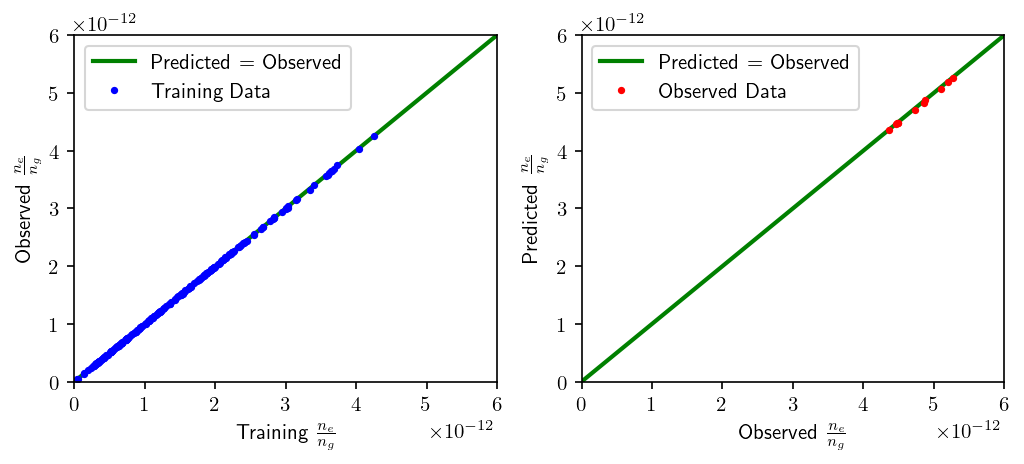

<Figure size 640x480 with 0 Axes>

In [46]:
plt.figure(dpi=150, figsize=(8, 3))
plt.rcParams['text.usetex'] = True

plt.subplot(121)
plt.plot([-0.1e-12,6e-12], [-0.1e-12,6e-12], 'g-', lw=2, label = 'Predicted = Observed')
plt.plot(y_train_val/(10.**12), y_pred_train[0]/(10.**12),'b.', ms=5, label = 'Training Data')
plt.xlim([0,6e-12])
plt.ylim([0,6e-12])
plt.xlabel(r'Training $\frac{n_e}{n_g}$')
plt.ylabel(r'Observed $\frac{n_e}{n_g}$')
plt.legend()

plt.subplot(122)
plt.plot([-0.1e-12,6e-12], [-0.1e-12,6e-12], 'g-', lw=2, label = 'Predicted = Observed')
plt.plot(y_test/(10.**12), y_pred_test[0]/(10.**12),'r.', ms=5, label = 'Observed Data')
plt.xlim([0,6e-12])
plt.ylim([0,6e-12])
plt.xlabel(r'Observed $\frac{n_e}{n_g}$')
plt.ylabel(r'Predicted $\frac{n_e}{n_g}$')
plt.legend()

plt.show()
location = r'C:\Users\vvmil\Documents\Python_Vmil\Jupyter_Notebooks\Plasma_He_calcs\He_code_new\dim_num_mb_val_test\packed\6_rates\lambda_0.003'
name = r'\mb_packed_parity.pdf'
path = location +name
plt.savefig(path)

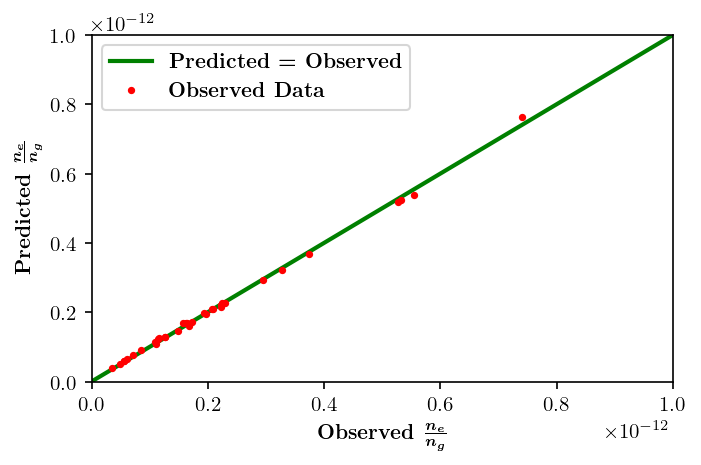

In [26]:
import matplotlib.pyplot as plt
import matplotlib
import sys
sys.path.append("Users\vvmil\AppData\Local\Programs\MiKTeX")
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble']=r'\usepackage{amsmath}'
plt.figure(dpi=150, figsize=(5, 3))
#plt.rcParams['text.usetex'] = True
#plt.rcParams['text.latex.preamble']=r'\usepackage{amsmath}'

font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 17}


plt.rcParams['font.family'] = 'Arial'

plt.plot([-0.1e-12,1.3e-12], [-0.1e-12,1.3e-12], 'g-', lw=2, label = r'\textbf{Predicted = Observed}')
plt.plot(y_test/(10.**12), y_pred_test[0]/(10.**12),'r.', ms=5, label = r'\textbf{Observed Data}')
plt.xlim([0,1.0e-12])
plt.ylim([0,1.0e-12])
plt.xlabel(r'\textbf{Observed }$\boldsymbol{\frac{n_e}{n_g}}$')
plt.ylabel(r'\textbf{Predicted }$\boldsymbol{\frac{n_e}{n_g}}$')
plt.legend()





current_path = r"C:\Users\vvmil\Documents\Python_Vmil\Jupyter_Notebooks\Plasma_He_calcs\dimensionless_numbers_mb\limited_terms"

test_parity_mb = current_path +r'\test_parity_mb.pdf'



plt.savefig(test_parity_mb, bbox_inches="tight")


plt.show()
